In [1]:
#Importing required libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
super_covid_data_long = pd.read_csv("../../../../data/Stage_1/super_covid19_long.csv")
super_covid_data_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [3]:
super_covid_data_long.head()

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869


In [4]:
super_covid_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427922 entries, 0 to 3427921
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   countyFIPS   int64 
 1   County Name  object
 2   State        object
 3   StateFIPS    int64 
 4   Dates        object
 5   cases        int64 
 6   deaths       int64 
 7   population   int64 
dtypes: int64(5), object(3)
memory usage: 209.2+ MB


In [5]:
super_covid_data_long['Date']= pd.to_datetime(super_covid_data_long['Dates'])
super_covid_data_long = super_covid_data_long.set_index('Dates')

start_date= ''
end_date= ''
super_covid_data_long=super_covid_data_long.loc[super_covid_data_long['Date'].between('06-01-2022', '12-31-2022')] 

In [6]:
super_covid_data_long.head()

,countyFIPS,County Name,State,StateFIPS,cases,deaths,population,Date
Dates,,,,,,,,
2022-06-01,1001,Autauga County,AL,1,15969,216,55869,2022-06-01
2022-06-02,1001,Autauga County,AL,1,15978,216,55869,2022-06-02
2022-06-03,1001,Autauga County,AL,1,15978,216,55869,2022-06-03
2022-06-04,1001,Autauga County,AL,1,15978,216,55869,2022-06-04
2022-06-05,1001,Autauga County,AL,1,15978,216,55869,2022-06-05


### Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [11]:
import pandas as pd
from statistics import mode

# Defining a custom function to compute mode
def mode_func(x):
    try:
        m = mode(x)
        return m if m!=0 else "Multiple modes"
    except:
        return 'No mode'

# Choosing a state
state = 'AK'

# Filtering by state
state_df = super_covid_data_long[super_covid_data_long['State'] == state]

# Grouping by week and calculate mean, median, mode for new cases and deaths
weekly_stats = state_df.groupby(pd.Grouper(key='Date', freq='W-MON'))[['cases', 'deaths']].agg(['mean', 'median', mode_func]).reset_index()

# Printing weekly statistics
print(f'Weekly statistics for {state}:')
weekly_stats

Weekly statistics for AK:


Date        cases                       deaths                       
                      mean  median mode_func       mean median       mode_func
0  2022-06-06  8454.350575  1886.0      1918  42.448276    6.0  Multiple modes
1  2022-06-13  8533.418719  1895.0       608  42.448276    6.0  Multiple modes
2  2022-06-20  8602.729064  1902.0       608  42.448276    6.0  Multiple modes
3  2022-06-27  8678.586207  1913.0       608  42.448276    6.0  Multiple modes
4  2022-07-04  8771.719212  1923.0       608  42.448276    6.0  Multiple modes
5  2022-07-11  8841.773399  1939.0       608  43.137931    6.0  Multiple modes
6  2022-07-18  8918.423645  1955.0       608  43.172414    6.0  Multiple modes
7  2022-07-25  8990.142857  1968.0       608  43.172414    6.0  Multiple modes
8  2022-08-01  9057.389163  1974.0       608  43.172414    6.0  Multiple modes
9  2022-08-08  9137.295567  1995.0       608  43.586207    7.0  Multiple modes
10 2022-08-15  9191.571429  2009.0       608  43.896552    7.0  Multiple modes
11 2022-08-22  9248.098522  2020.0       608  44.093596    7.0  Multiple modes
12 2022-08-29  9291.246305  2035.0      1026  44.172414    7.0  Multiple modes
13 2022-09-05  9319.527094  2037.0       608  44.172414    7.0  Multiple modes
14 2022-09-12  9355.172414  2044.0       608  44.541872    7.0  Multiple modes
15 2022-09-19  9380.216749  2054.0       768  45.034483    7.0  Multiple modes
16 2022-09-26  9403.551724  2060.0       608  45.034483    7.0  Multiple modes
17 2022-10-03  9412.862069  2061.0       772  45.034483    7.0  Multiple modes
18 2022-10-10  9422.369458  2061.0       608  45.290640    7.0  Multiple modes
19 2022-10-17  9453.152709  2084.0       775  45.931034    9.0  Multiple modes
20 2022-10-24  9463.384236  2090.0       775  46.024631    9.0  Multiple modes
21 2022-10-31  9476.773399  2094.0      1040  46.586207    9.0  Multiple modes
22 2022-11-07  9489.369458  2101.0       608  46.586207    9.0  Multiple modes
23 2022-11-14  9494.571429  2102.0       608  46.699507    9.0  Multiple modes
24 2022-11-21  9505.748768  2107.0      1045  47.379310   10.0  Multiple modes
25 2022-11-28  9527.236453  2108.0       761  47.379310   10.0  Multiple modes
26 2022-12-05  9534.275862  2108.0      1045  47.379310   10.0  Multiple modes
27 2022-12-12  9547.931034  2110.0       765  47.379310   10.0  Multiple modes
28 2022-12-19  9559.655172  2118.0       608  47.472906   10.0  Multiple modes
29 2022-12-26  9580.743842  2125.0       767  48.034483   10.0               2
30 2023-01-02  9582.206897  2125.0       767  48.034483   10.0               2

### Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

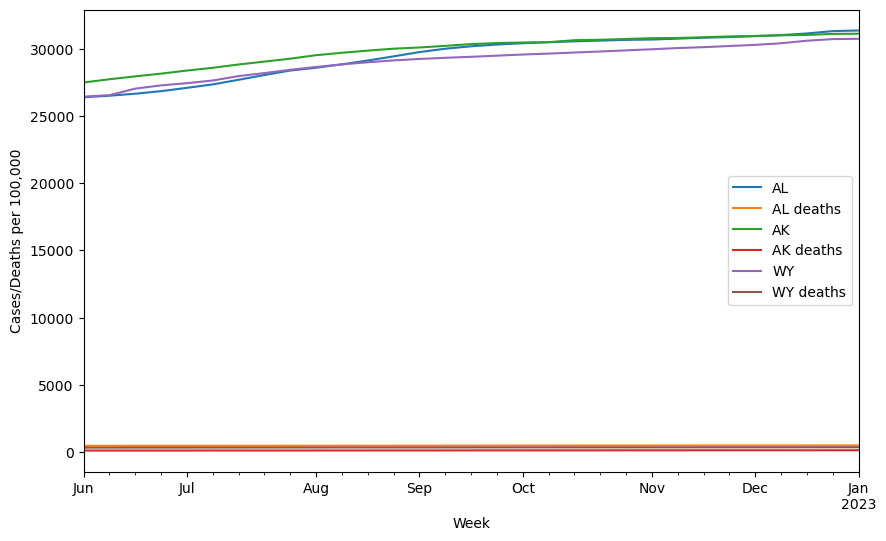

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the data for the 3 states we're interested in
states = ['AL', 'AK', 'WY']
state_data = super_covid_data_long[super_covid_data_long['State'].isin(states)]

# Calculating the normalization factor
state_data['norm_factor'] = state_data['population'] / 100000

# Creating a new column for the normalized cases and deaths
state_data['norm_cases'] = state_data['cases'] / state_data['norm_factor']
state_data['norm_deaths'] = state_data['deaths'] / state_data['norm_factor']

# Grouping the data by week and calculating the mean normalized cases and deaths
weekly_data = state_data.groupby(['State', pd.Grouper(key='Date', freq='W')]).mean()

# Creating a line plot of the normalized cases and deaths for each state
fig, ax = plt.subplots(figsize=(10, 6))
for state in states:
    weekly_data.loc[state, 'norm_cases'].plot(ax=ax, label=state)
    weekly_data.loc[state, 'norm_deaths'].plot(ax=ax, label=state + ' deaths')

ax.set_xlabel('Week')
ax.set_ylabel('Cases/Deaths per 100,000')
ax.legend()
plt.show()

We can clearly see in the graph above that the number of deaths has remained constant, while the number of cases has kind of increased but not exponentially. If we look at this time period, when the government lets people do some physical activities and people don't follow public health rules like wearing masks and staying away from people, this can make the virus spread more. Also, every place has a standard way to do covid tests, which helps find more cases. The same holds true for the death rate: despite the availability of vaccines, some individuals may continue to resist getting vaccinated, which may contribute to the virus's persistence and the mortality rate. There are a number of possible causes for this resistance, including personal beliefs, misinformation, and mistrust. There may be an increase in infections and deaths as a result of vaccines not being as effective against the new omicron variants. People may become worn out and let their guard down after dealing with the pandemic for more than a year, resulting in an increase in infections and deaths.

### Identify 3 counties within a state of your choice with high cases and death rates.

In [13]:
# Choosing a state of our choice
state = 'AK'

# Filtering by state and selecting counties with highest cases and death rates
state_df = super_covid_data_long[super_covid_data_long['State'] == state]
top_counties = state_df.groupby('County Name')[['cases', 'deaths']].max().nlargest(3, columns=['cases', 'deaths']).reset_index()

# Printing the top 3 counties
print(f'Top 3 counties in {state} by cases and deaths:')
print(top_counties)

Top 3 counties in AK by cases and deaths:
                    County Name   cases  deaths
0     Municipality of Anchorage  118131     587
1     Matanuska-Susitna Borough   39471     271
2  Fairbanks North Star Borough   31396     159


### Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

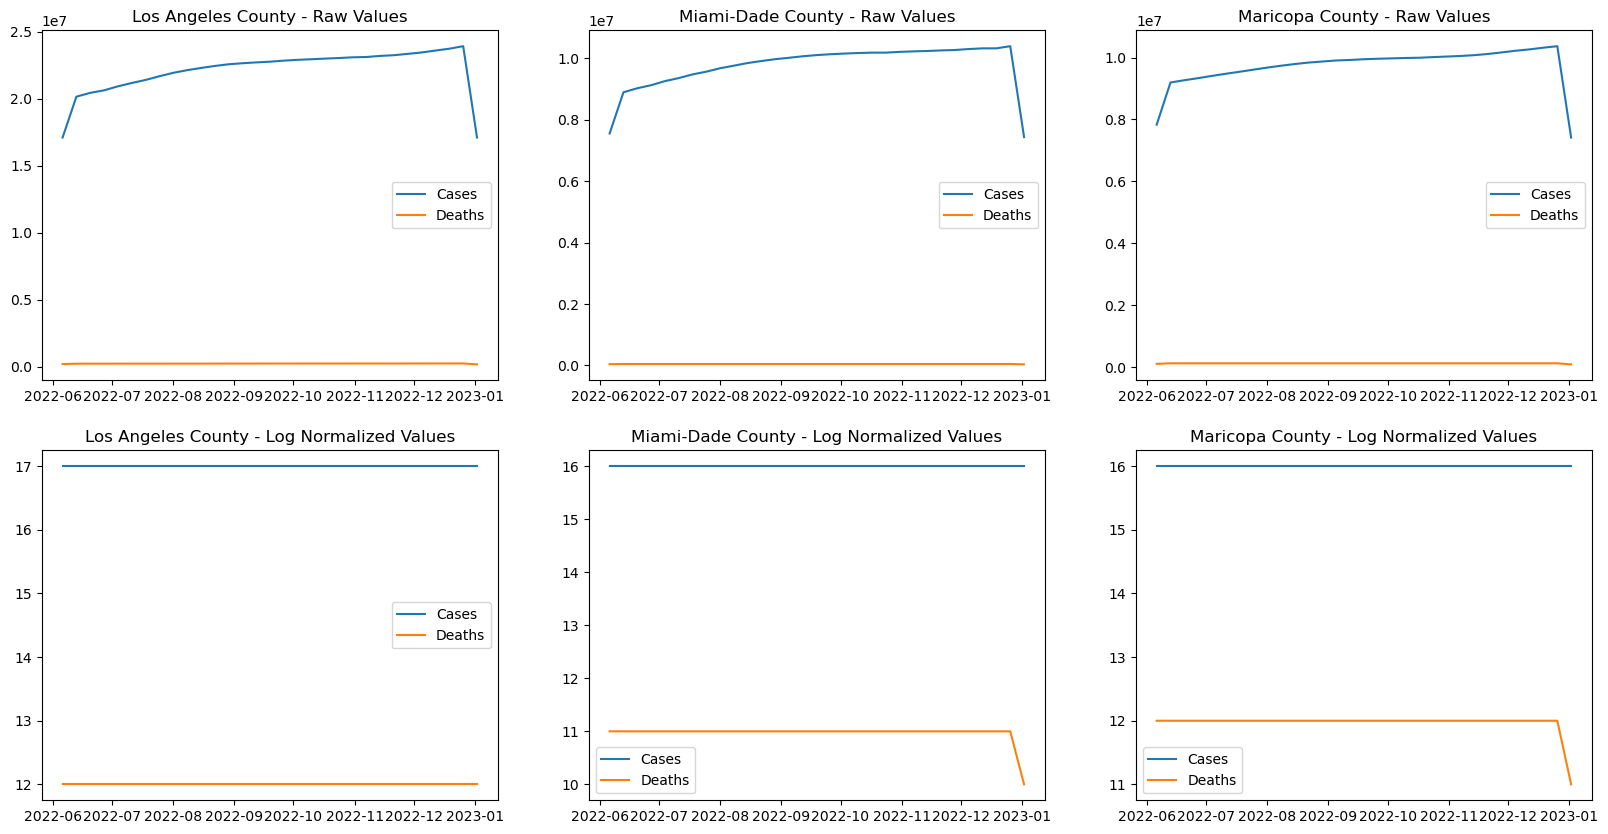

In [14]:
import matplotlib.pyplot as plt
import math

all_dates = pd.date_range(start=super_covid_data_long['Date'].min(), end=super_covid_data_long['Date'].max(), freq='D')
all_dates_df = pd.DataFrame({'Date': all_dates})
merged_df = pd.merge(all_dates_df, super_covid_data_long, on='Date', how='left')
merged_df = merged_df.fillna(0)
merged_df = merged_df.set_index('Date')

# Filtering the top 3 infected counties based on the number of cases
top_countries = super_covid_data_long.groupby('County Name')['cases'].sum().sort_values(ascending=False)[:3].index.tolist()
top_df = super_covid_data_long[super_covid_data_long['County Name'].isin(top_countries)]

# Grouping the data by week and sum the cases and deaths for each week
weekly_df = merged_df.groupby(['County Name', pd.Grouper(freq='W-MON')])[['cases', 'deaths']].sum().reset_index()
# weekly_df = super_covid_data_long.groupby(['County Name', pd.Grouper(freq='W-MON')])[['cases', 'deaths']].sum().reset_index()
# weekly_df = top_df.groupby(['County Name', pd.Grouper(key='Dates', freq='W-MON')])[['cases', 'deaths']].sum().reset_index()

# Plotting the weekly trends for each county using Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, county in enumerate(top_countries):
    # Raw values plot
    axs[0, i].plot(weekly_df[weekly_df['County Name'] == county]['Date'], 
                   weekly_df[weekly_df['County Name'] == county]['cases'], 
                   label='Cases')
    axs[0, i].plot(weekly_df[weekly_df['County Name'] == county]['Date'], 
                   weekly_df[weekly_df['County Name'] == county]['deaths'], 
                   label='Deaths')
    axs[0, i].set_title(f'{county} - Raw Values')
    axs[0, i].legend()

    # Log normalized values plot
    axs[1, i].plot(weekly_df[weekly_df['County Name'] == county]['Date'], 
                   weekly_df[weekly_df['County Name'] == county]['cases'].apply(lambda x: max(1, x)).apply(lambda x: round(math.log(x))), 
                   label='Cases')
    axs[1, i].plot(weekly_df[weekly_df['County Name'] == county]['Date'], 
                   weekly_df[weekly_df['County Name'] == county]['deaths'].apply(lambda x: max(1, x)).apply(lambda x: round(math.log(x))), 
                   label='Deaths')
    axs[1, i].set_title(f'{county} - Log Normalized Values')
    axs[1, i].legend()

plt.show()

Based on the visualization above, we can say that the pick week is between June first week and December last week. As lockdowns and other preventative measures are lifted, people may become less cautious about following guidelines like wearing masks, social distancing, and avoiding large gatherings. This is because if we research from January to May, the number of cases is decreasing, and the same is true for deaths. However, from June onwards, the number of cases is increasing, and there are many reasons for this. The virus could spread more easily as a result of this. Traveling internationally (although it is banned for some countries) can aid in the spread of the virus, particularly if the travelers are from regions with high rates of COVID-19 cases or new variants. The number of cases and deaths has decreased since January.